<a href="https://colab.research.google.com/github/Programming-Daniel/SemanaTec/blob/main/09_2_actividad_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Estadística básica

* **Nombre: Daniel Conreras Chávez**
* **Matrícula: A01710608**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [12]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
!curl -O https://raw.githubusercontent.com/Manchas2k4/tc1002S/main/datasets/bestsellers%20with%20categories.csv
df = pd.read_csv('bestsellers%20with%20categories.csv')
df.head(6)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 51161  100 51161    0     0   310k      0 --:--:-- --:--:-- --:--:--  308k


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [4]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

**Al ver el análisis de la correlación, podemos ver que no hay una que afecte en mayor medida a las otras, además de que year resulta irrelevante.**

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

Si, para realizar un análisis correcto, sería necesario eliminar las columnas de nombre, autor, género y year.
* ¿Existen variables que tengan datos extraños?

No
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

No, no están en rangos similares, y si puede llegar a afectar el hecho de que la escala no esté normalizada.
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Price y user rating.
Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

<Axes: xlabel='Reviews'>

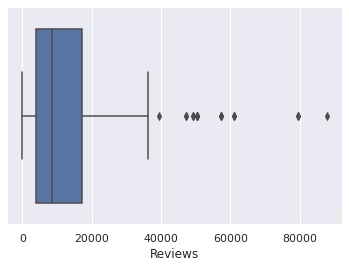

In [7]:
ndf = df.drop('Name',axis=1)
ndf = ndf.drop('Author',axis=1)
ndf = ndf.drop('Genre',axis=1)
ndf= ndf.drop('Year',axis=1)

sns.boxplot(data=ndf, x='Reviews')

<Axes: >

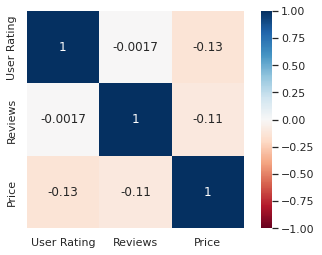

In [8]:
ndf_corr = ndf.corr()

sns.heatmap(data=ndf_corr,vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

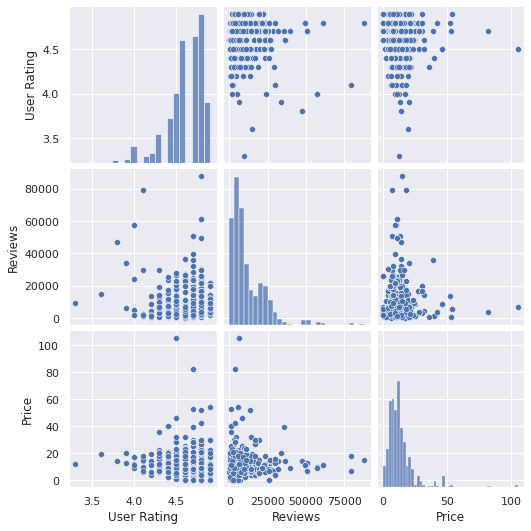

In [9]:
sns.pairplot(data=ndf)

**Después de ver las diferentes gráficas, en especial las vistas en el pairplot (Donde también hay gráficas de dispersión) Podemos concluir que si hay imágenes espejo, por lo que todas las variables propuestas pueden ser usadas para el análisis.**

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Si, si pueden ser representativos, pues para calcularlos se uiliza la media de los valores y son los puntos que se encuentran más cerca a los centroides.
- ¿Cómo obtuviste el valor de $k$ a usar?

El valor de k se obtuvo al analizar el pairplot donde podemos observar que hay 4 clusters.
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Si se empleara un valor de k más elevado, los centros que se obtendrían serían más detallados, pero la interpretación de los resultados sería más difícil. Para un valor de k mas bajo, esto se invierte, obtenemos algo más general y abarcador.
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Si hay valores extremos (outliers) en el análisis de cajas y bigotes, los centroides obtenidos mediante el algoritmo K-Means podrían ser influenciados por ellos y no reflejar adecuadamente la mayoría de los datos. Esto puede afectar negativamente la interpretación y efectividad del agrupamiento resultante. Por lo tanto, es importante tratar los outliers antes de aplicar K-Means para obtener una agrupación más precisa y significativa.
- ¿Qué puedes decir de los datos basándose en los centros?

Como los datos se agrupan en los mismos 4 centros de nuestras variables podemos decir que estas son las necesarias para que los libros tengan altas reviews o éxito.

In [10]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.

from sklearn.preprocessing import StandardScaler

numeric_cols = ['Price','Reviews','User Rating']
x = ndf.loc[:, numeric_cols]

scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

x_norm = pd.DataFrame(x_norm, columns=numeric_cols)
x_norm.head()

,Price,Reviews,User Rating
0,-0.470810,0.460453,0.359990
1,0.821609,-0.844786,-0.080978
2,0.175400,0.599440,0.359990
3,-0.655441,0.808050,0.359990
4,-0.101547,-0.365880,0.800958


In [13]:
for k in range(2,4):
  model = KMeans(n_clusters = k)
  groups = model.fit_predict(x)
  centros = model.cluster_centers_
  print(centros)

[[1.02348485e+01 2.83367803e+04 4.65530303e+00]
 [1.40047847e+01 6.77954545e+03 4.60669856e+00]]
[[1.06231884e+01 2.29664783e+04 4.68115942e+00]
 [1.40202020e+01 6.23506313e+03 4.60479798e+00]
 [1.16875000e+01 5.84903750e+04 4.41250000e+00]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Silhouette Score')

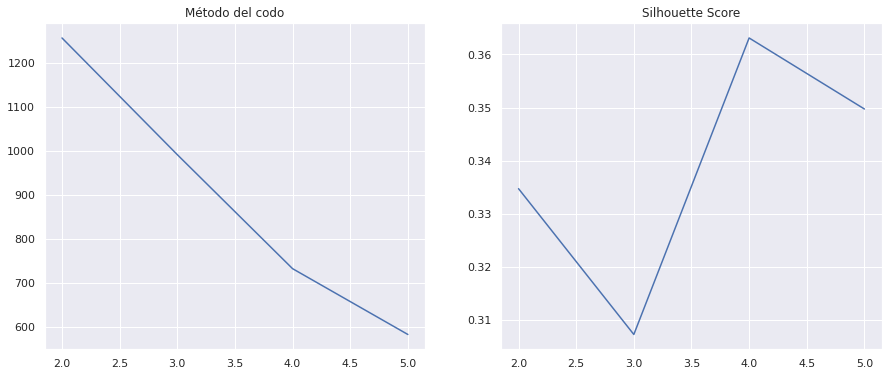

In [14]:
kmax   = 6
grupos = range(2, kmax)
wcss   = []
sil_score = []

for k in grupos:
    model = KMeans(n_clusters=k, random_state = 47)

    clusters = model.fit_predict(x_norm)

    wcss.append(model.inertia_)

    sil_score.append(silhouette_score(x_norm, clusters))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

Como se puede ver, en el silhouette el punto más alto es 4, por lo que nuestra observación en el número de clusters es correcta.

In [15]:
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(x_norm)

ndf['Grupo'] = clusters.astype('str')
ndf.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,User Rating,Reviews,Price,Grupo
0,4.7,17350,8,0
1,4.6,2052,22,2
2,4.7,18979,15,0
3,4.7,21424,6,0
4,4.8,7665,12,2


Text(0.5, 1.05, '4 grupos de libros')

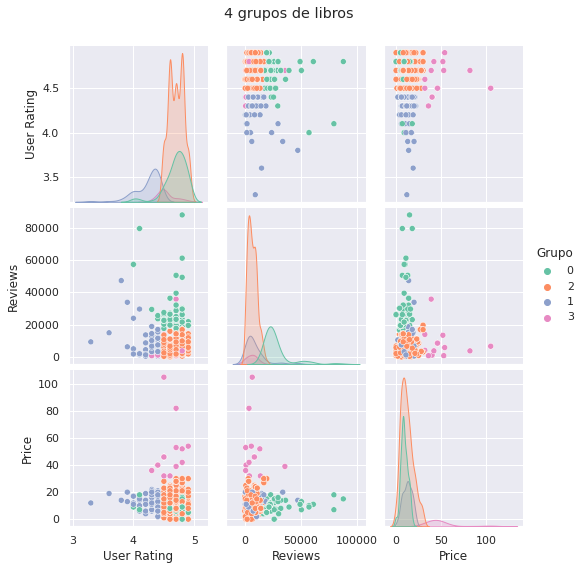

In [16]:
sns.pairplot(data=ndf, hue='Grupo', palette='Set2')
plt.suptitle('4 grupos de libros', y=1.05)

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

-El grupo 0 al ser en el que se encuentran los libros con mayor puntuación en las reseñas, podría llamarse "Mejor votados".

-El grupo 1 puede ser llamado "Más populares" pues tienen gran cantidad de 
reseñas, pero éstas son variadas.

-El grupo 2, al tener una poca cantidad de reseñas, y ser positivas, podrá
estar en la categoría de "Aclamados por su audiencia".

-Finalmente el grupo 3 pueden ser llamados "Indies" pues tienen pocas reseñas
pero con altas calificaciones.

In [19]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.

ndf.groupby('Grupo').describe()

User Rating                                                Reviews  \
            count      mean       std  min  25%  50%    75%  max   count   
Grupo                                                                      
0           130.0  4.693846  0.184161  4.0  4.6  4.7  4.800  4.9   130.0   
1            84.0  4.232143  0.208933  3.3  4.1  4.3  4.400  4.4    84.0   
2           310.0  4.698065  0.118770  4.5  4.6  4.7  4.800  4.9   310.0   
3            26.0  4.538462  0.144435  4.3  4.5  4.5  4.575  4.9    26.0   

                     ...                     Price                        \
               mean  ...       75%      max  count       mean        std   
Grupo                ...                                                   
0      27444.646154  ...  27008.75  87841.0  130.0   9.084615   3.833825   
1       8631.666667  ...  11616.00  47265.0   84.0  12.416667   5.013736   
2       6753.977419  ...   9372.00  19735.0  310.0  11.900000   6.819423   
3       7219.538462  ...   8580.00  35799.0   26.0  49.692308  18.750508   

                                       
        min    25%   50%   75%    max  
Grupo                                  
0       0.0   6.00   8.0  11.0   18.0  
1       2.0   8.75  13.0  17.0   22.0  
2       0.0   7.00  10.0  16.0   30.0  
3      32.0  40.00  46.0  46.0  105.0  

[4 rows x 24 columns]

In [20]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
import plotly.express as px

fig = px.scatter_3d(ndf, x = 'User Rating', y = 'Price', 
                    z = 'Reviews', 
                    title='4 grupos de libros',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)
fig.show()

Como se mencionó anteriormente en la descripción de los grupos:

El grupo 0 corresponde con una mayor cantidad de reseñas y los puntajes altos, además de que tienen un precio bajo

Los libros correspondientes al grupo 1 tienen un precio bajo, una cantidad normal de reseñas y en cuanto a puntuaciones es el grupo con la más baja puntuación.

En cuanto al grupo 2, estos libros tienen un precio bajo muy baja cantidad de reseñas y puntuaciones altas.

Finalmente, al grupo 3 le corresponden los libros con la puntución más alta, así como un precio alto, pero tienen la menor cantidad de reseñas de los grupos.